<a href="https://colab.research.google.com/github/Praneet-Prabhanjan/EV_Market_segmentation_analysis/blob/main/Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
#read the dataset
data = pd.read_csv("/content/dataset_1.csv")

In [ ]:
#converting attributes to list
data.columns.values.tolist()

['Unnamed: 0',
 'Brand',
 'Model',
 'AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [ ]:
#defining dimensions of data_set
data.shape

(103, 15)

In [ ]:
data.head

<bound method NDFrame.head of      Unnamed: 0        Brand                            Model  AccelSec  \
0             0       Tesla     Model 3 Long Range Dual Motor       4.6   
1             1  Volkswagen                         ID.3 Pure      10.0   
2             2    Polestar                                 2       4.7   
3             3         BMW                              iX3        6.8   
4             4       Honda                                e        9.5   
..          ...          ...                              ...       ...   
98           98      Nissan                       Ariya 63kWh       7.5   
99           99        Audi     e-tron S Sportback 55 quattro       4.5   
100         100      Nissan               Ariya e-4ORCE 63kWh       5.9   
101         101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1   
102         102       Byton                 M-Byte 95 kWh 2WD       7.5   

     TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCha

In [ ]:
#selecting attributes for further analysis
features = ['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','RapidCharge','PowerTrain','PlugType','BodyStyle','Seats', 'PriceEuro']

In [ ]:
#drop null values if present
data.dropna(subset = features)

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
#converting PriceEuro to PriceInr
exchange_rate = 91.21
data['PriceINR'] = data['PriceEuro'] * exchange_rate
data.head

<bound method NDFrame.head of      Unnamed: 0        Brand                            Model  AccelSec  \
0             0       Tesla     Model 3 Long Range Dual Motor       4.6   
1             1  Volkswagen                         ID.3 Pure      10.0   
2             2    Polestar                                 2       4.7   
3             3         BMW                              iX3        6.8   
4             4       Honda                                e        9.5   
..          ...          ...                              ...       ...   
98           98      Nissan                       Ariya 63kWh       7.5   
99           99        Audi     e-tron S Sportback 55 quattro       4.5   
100         100      Nissan               Ariya e-4ORCE 63kWh       5.9   
101         101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1   
102         102       Byton                 M-Byte 95 kWh 2WD       7.5   

     TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCha

In [ ]:
data['RapidCharge'].replace(to_replace = ['No','Yes'],value=[0,1],inplace=True)
data.head

<bound method NDFrame.head of      Unnamed: 0        Brand                            Model  AccelSec  \
0             0       Tesla     Model 3 Long Range Dual Motor       4.6   
1             1  Volkswagen                         ID.3 Pure      10.0   
2             2    Polestar                                 2       4.7   
3             3         BMW                              iX3        6.8   
4             4       Honda                                e        9.5   
..          ...          ...                              ...       ...   
98           98      Nissan                       Ariya 63kWh       7.5   
99           99        Audi     e-tron S Sportback 55 quattro       4.5   
100         100      Nissan               Ariya e-4ORCE 63kWh       5.9   
101         101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1   
102         102       Byton                 M-Byte 95 kWh 2WD       7.5   

     TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCh

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    int64  
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
 15  PriceINR         103 non-null    float64
dtypes: float64(2), int64(8), object(6)
memory usage: 13.0+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
PriceINR           0
dtype: int64

In [ ]:
#Descriptive stats
data.describe()

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,PriceINR
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,5.090573e+06
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,3.113423e+06
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1.835966e+06
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,3.140315e+06
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,4.104450e+06
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5.928650e+06
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,1.961015e+07


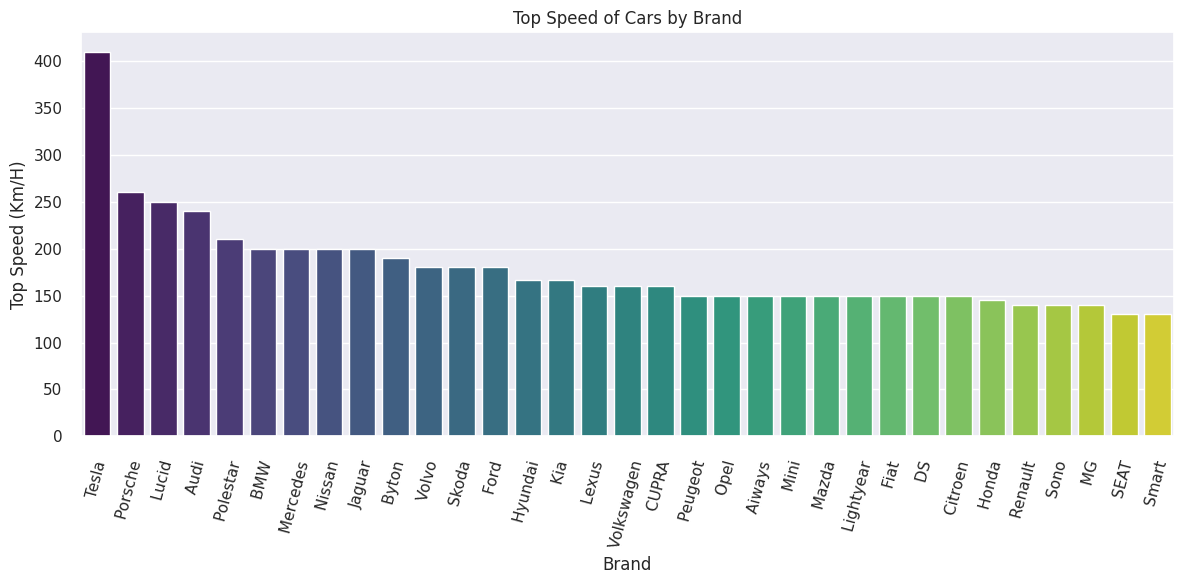

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=data.groupby('Brand')['TopSpeed_KmH'].max().sort_values(ascending=False).index,
            y=data.groupby('Brand')['TopSpeed_KmH'].max().sort_values(ascending=False).values,
            palette="viridis").set(xlabel='Brand', ylabel='Top Speed (Km/H)', title='Top Speed of Cars by Brand')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

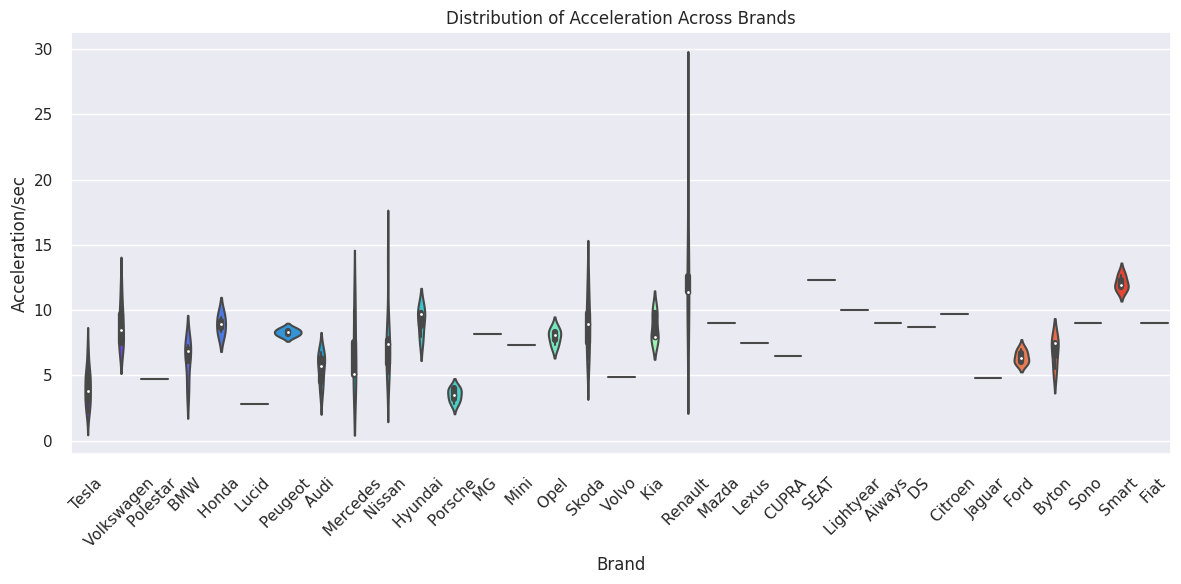

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Brand', y='AccelSec', data=data, palette='rainbow')
plt.xlabel('Brand')
plt.ylabel('Acceleration/sec')
plt.title('Distribution of Acceleration Across Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

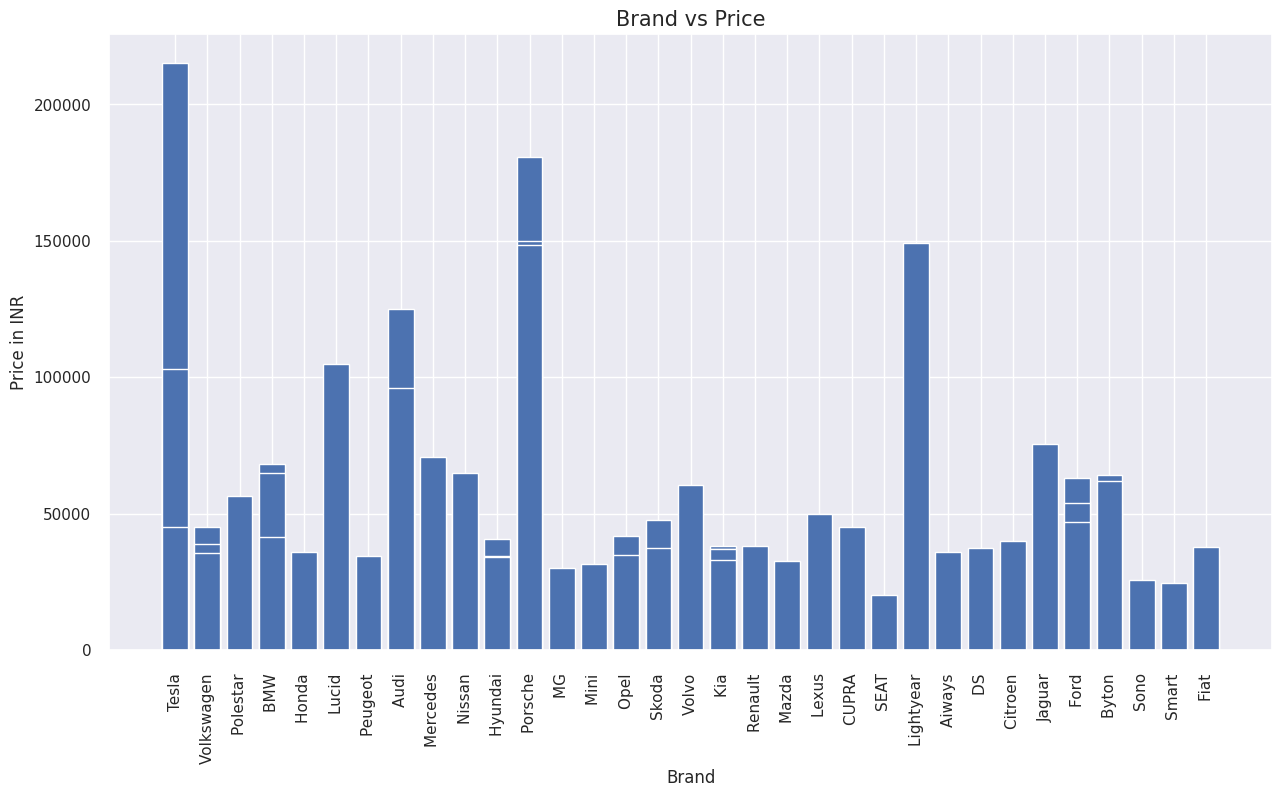

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(data.Brand, data.PriceEuro)
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
fig = px.bar(data,
             x='Range_Km',
             y='PowerTrain',
             color='PowerTrain',
             text='PowerTrain',
             labels={'Range_Km': 'Range (Km)', 'PowerTrain': 'Power Train'})

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title='Power Train vs. Range', xaxis_title='Range (Km)', yaxis_title='Power Train')
fig.update_layout(legend_title=None)

# Show the plot
pio.show(fig)

In [ ]:
fig = px.pie(data,
             names='Brand',
             values='PriceINR',
             title='Distribution of Prices by Brand',
             hover_data=['PriceINR'],
             labels={'PriceINR': 'Price (INR)'})

# Customize the layout
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1], opacity=0.8)
fig.update_layout(title_font_size=20, title_x=0.5, showlegend=True)
fig.update_layout(legend=dict(title=None))

# Show the plot
pio.show(fig)

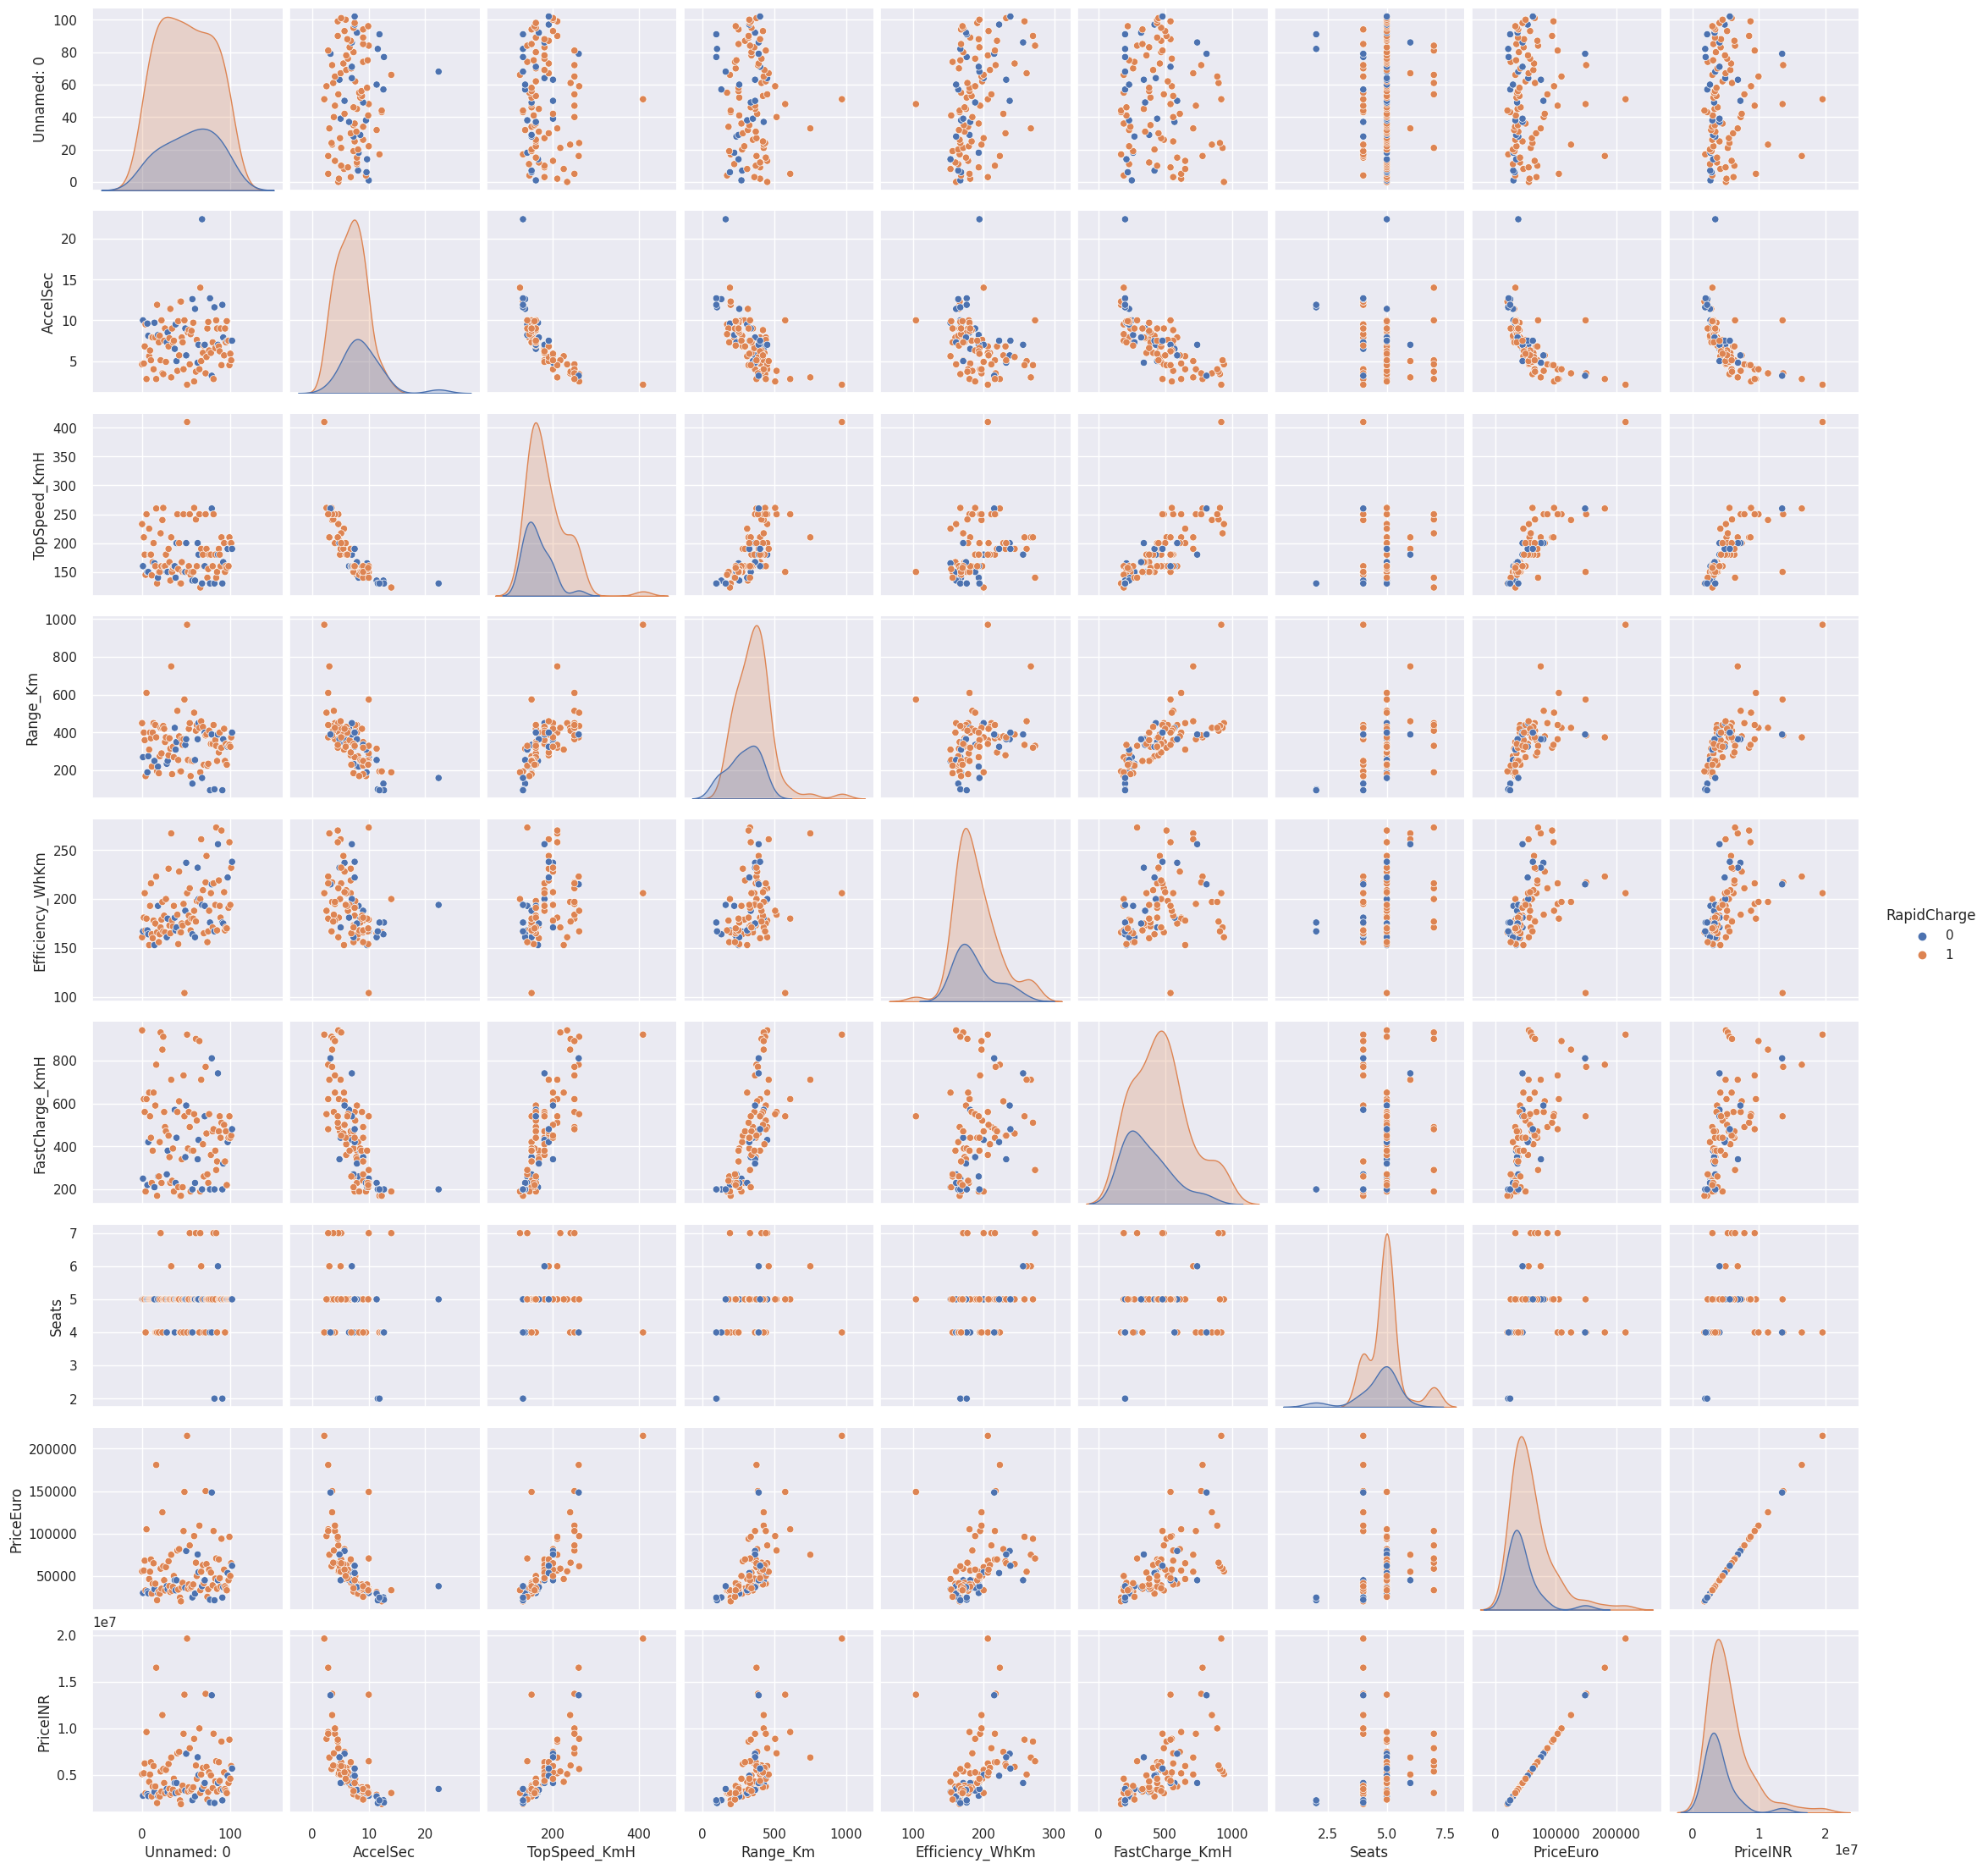

In [ ]:
sb.pairplot(data,hue='RapidCharge')

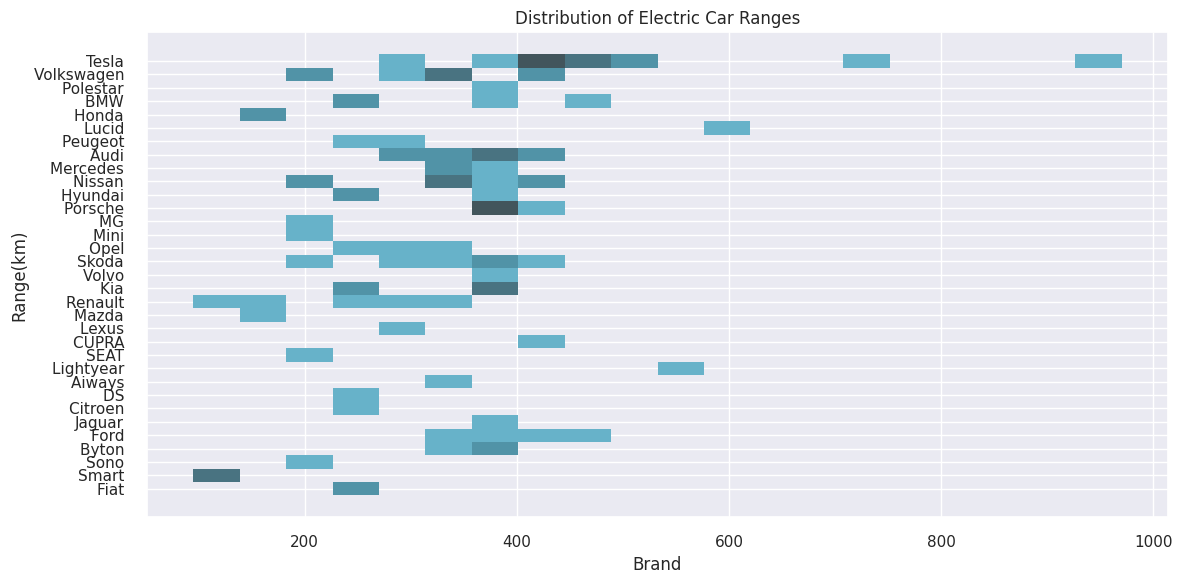

In [ ]:
#Range a car can achieve
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Range_Km', y = "Brand", bins=20, kde=True, color='c')
plt.xlabel('Brand')
plt.ylabel('Range(km)')
plt.title('Distribution of Electric Car Ranges')
plt.tight_layout()

# Show the plot
plt.show()

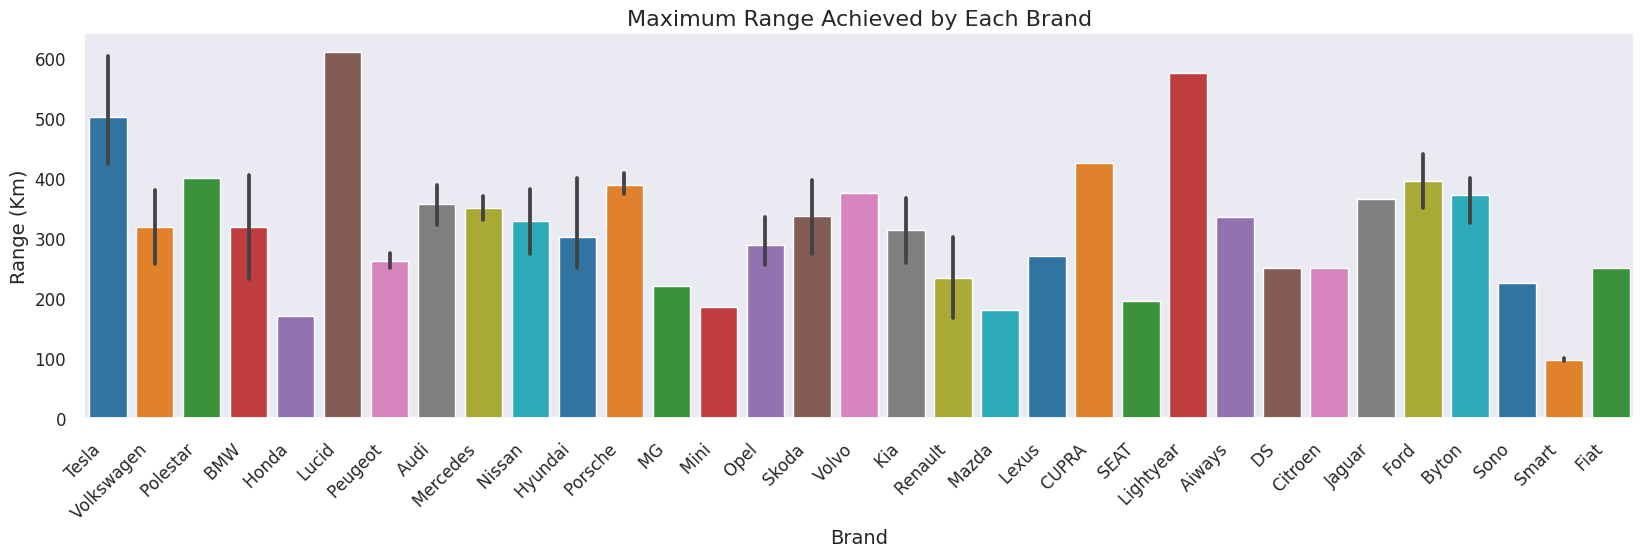

In [ ]:
plt.figure(figsize=(20, 5))
ax = sb.barplot(x='Brand', y='Range_Km', data=data, palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range Achieved by Each Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Range (Km)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

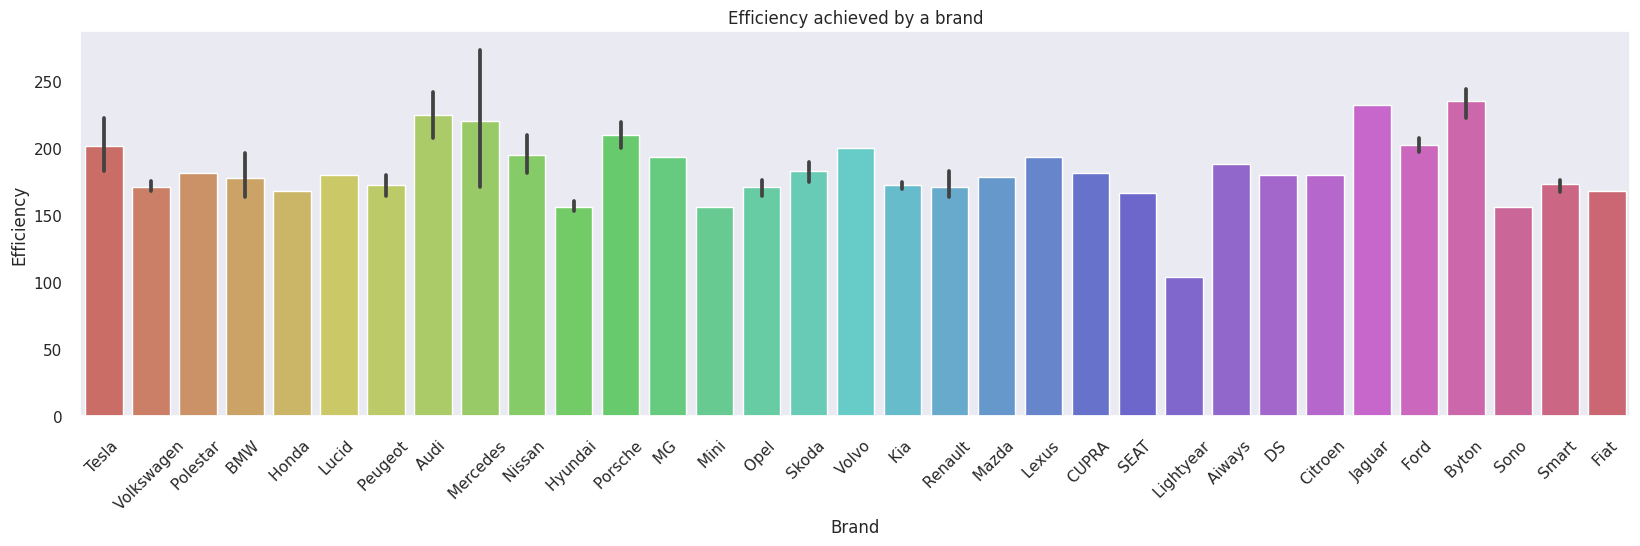

In [ ]:
#calculate car efficiency
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=data,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

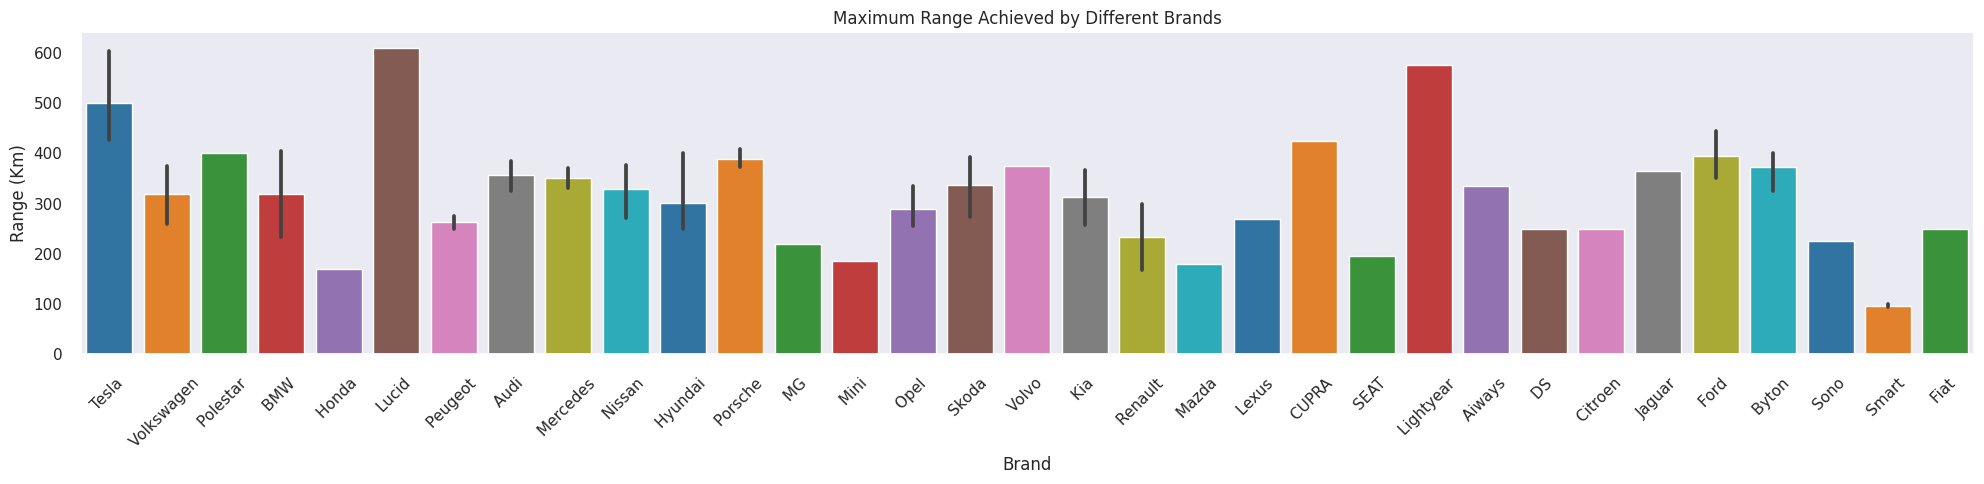

In [ ]:
ax = plt.figure(figsize=(20, 5))
sb.barplot(x='Brand', y='Range_Km', data=data, palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range Achieved by Different Brands')
plt.xlabel('Brand')
plt.ylabel('Range (Km)')
plt.xticks(rotation=45)
plt.tight_layout()  # Added for better layout spacing
plt.show()


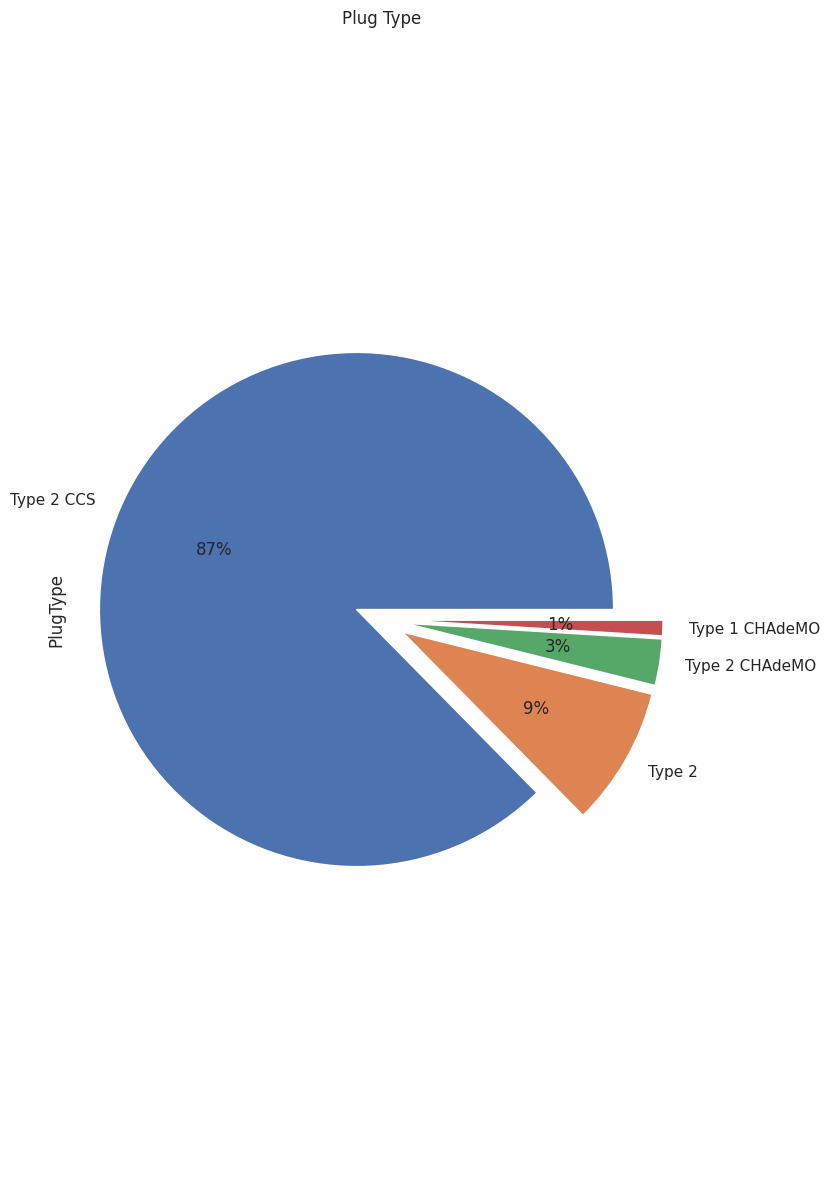

In [ ]:
plt.figure(figsize=(8, 15))
data['PlugType'].value_counts().plot.pie(autopct='%.0f%%', explode=(0.1, 0.1, 0.1, 0.1))
plt.title('Plug Type')
plt.axis('equal')
plt.show()

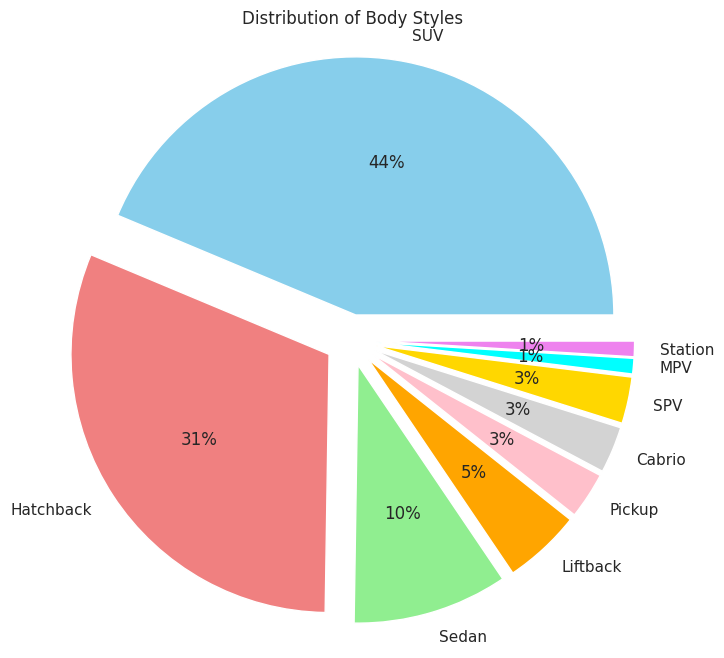

In [ ]:
body_style_counts = data['BodyStyle'].value_counts()

# Custom colors for the pie chart
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'lightgrey', 'gold', 'cyan', 'violet']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, colors=colors,
        autopct='%.0f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Distribution of Body Styles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
fig = px.sunburst(data, path=['TopSpeed_KmH','Range_Km'], values='Seats', color='Range_Km')
pio.show(fig)

In [ ]:
fig = px.sunburst(data, path=['Brand', 'Range_Km'], values='Seats', color='Range_Km')
pio.show(fig)

<ipython-input-27-16bfea7defe7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



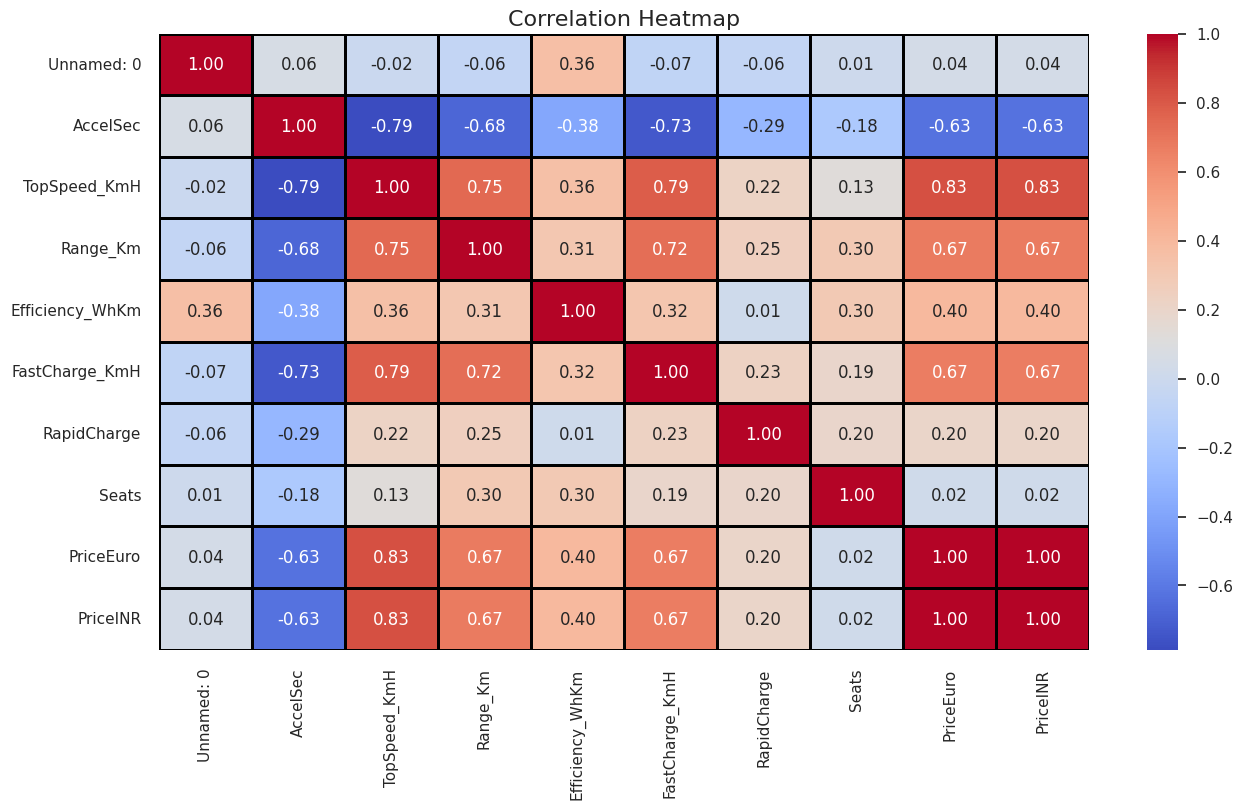

In [ ]:
plt.figure(figsize=(15, 8))
heatmap = sb.heatmap(data.corr(), linewidths=1, linecolor='black', annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
data ['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=data[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=data['PriceEuro']

In [ ]:
import statsmodels.api as sm
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           1.57e-24
Time:                        12:50:11   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
prediction_1 = lr.predict(X_test)

In [ ]:
r2=(r2_score(y_test,prediction_1))
print(r2*100)

78.77072380232661


In [ ]:
y1=data[['RapidCharge']]
x1=data[['PriceEuro']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
prediction_1 = log.predict(X1_test)
prediction_1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix = confusion_matrix(y1_test, prediction_1)
confusion_matrix

array([[ 0,  6],
       [ 0, 15]])

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

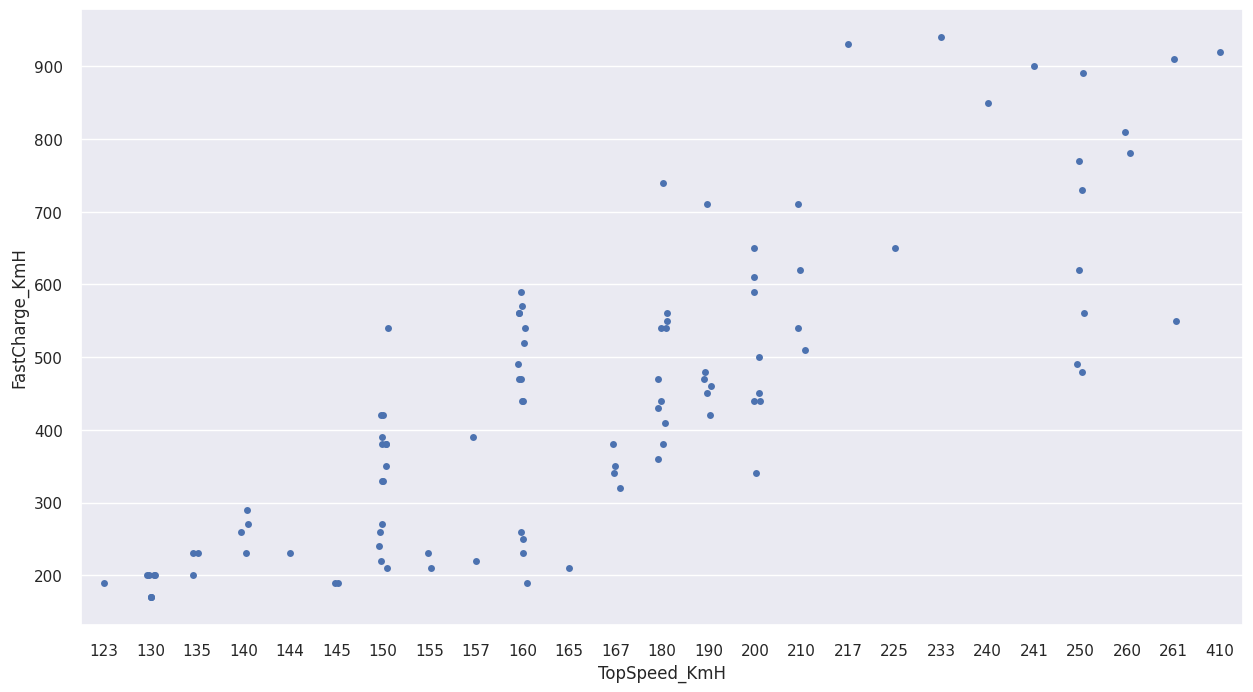

In [ ]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=data, jitter=True)

In [ ]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'PriceINR','PowerTrain']
# Separating out the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data_2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data_2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904
...,...,...,...,...,...,...,...,...,...
98,-0.297170,0.446713,-0.463601,0.102542,-0.346005,-0.100457,0.031080,0.202253,0.145390
99,2.335018,0.630747,0.985883,1.560112,-0.817327,-0.121906,0.164115,-0.255651,0.141023
100,0.780642,0.426821,-0.298636,0.708598,0.481728,-0.540071,-0.139753,-0.048733,-0.367509
101,1.540920,0.698754,0.422384,1.094921,-0.298113,-0.307992,-0.363230,0.127251,-0.190397


In [ ]:
df=data_2.iloc[:,:9]
df.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.396410,0.086150,0.064757,0.058253,0.144548,0.676910,0.412498,0.270655,-0.324562
PC2,0.421973,-0.216762,0.002272,-0.068523,0.038208,0.045212,0.037576,-0.413810,-0.770777
PC3,0.238316,0.330919,0.571780,0.380475,-0.575143,0.024863,0.004703,0.144167,-0.098954
PC4,0.394519,-0.138428,-0.047650,-0.296483,-0.092366,-0.237914,0.728208,0.358365,0.105702
Pc5,0.157195,0.269920,-0.803300,0.395300,-0.292581,0.086978,0.053875,0.040830,-0.056056
PC6,0.389544,-0.024746,-0.076295,-0.387135,-0.032841,0.364461,-0.520811,0.534180,-0.038015
PC7,0.140425,0.801307,0.019535,-0.428983,0.165256,0.086668,0.098379,-0.320750,0.079999
PC8,0.389779,-0.262265,0.073787,0.179862,0.043293,0.558706,0.118043,-0.382139,0.517207
PC9,0.322888,0.180494,0.098293,0.486554,0.722814,-0.149888,-0.019098,0.265275,-0.033267


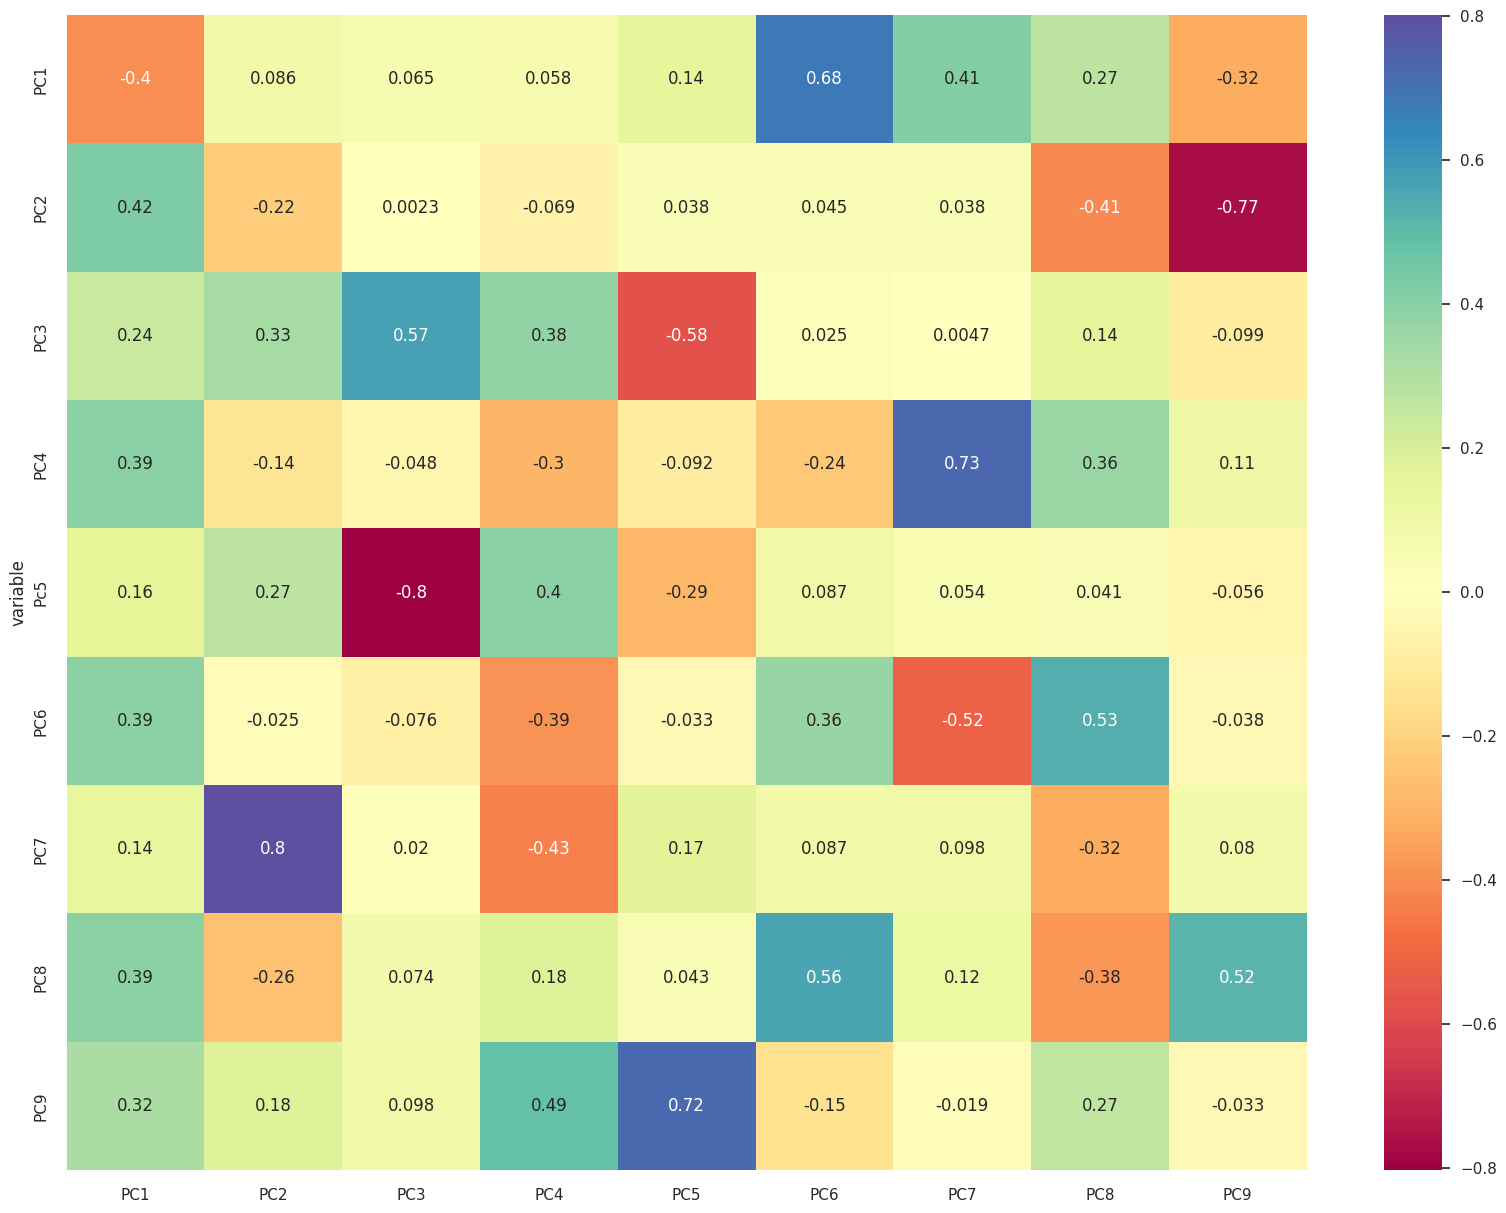

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

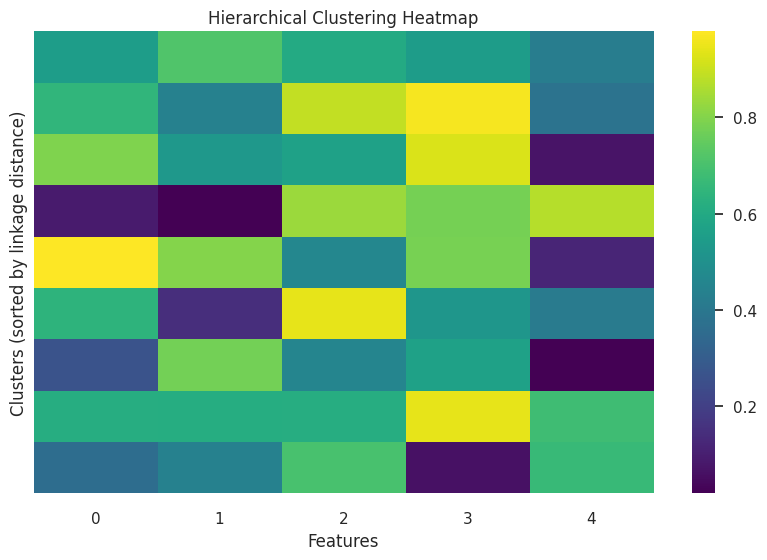

In [ ]:
np.random.seed(0)
data_2 = np.random.rand(10, 5)

# Perform hierarchical clustering
linked = linkage(data_2, 'complete')

# Create a figure with Seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_2[np.argsort(linked[:, 2])], cmap='viridis', yticklabels=False)
plt.xlabel('Features')
plt.ylabel('Clusters (sorted by linkage distance)')
plt.title('Hierarchical Clustering Heatmap')
plt.show()

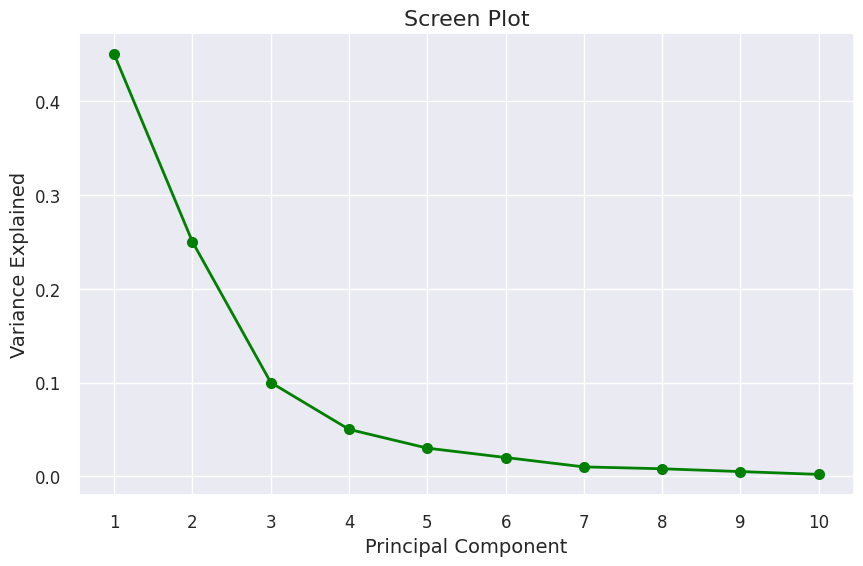

In [ ]:
PC_values = np.arange(1, 11)
explained_variance_ratio = np.array([0.45, 0.25, 0.1, 0.05, 0.03, 0.02, 0.01, 0.008, 0.005, 0.002])

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(PC_values, explained_variance_ratio, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Screen Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variance Explained', fontsize=14)
plt.xticks(PC_values, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

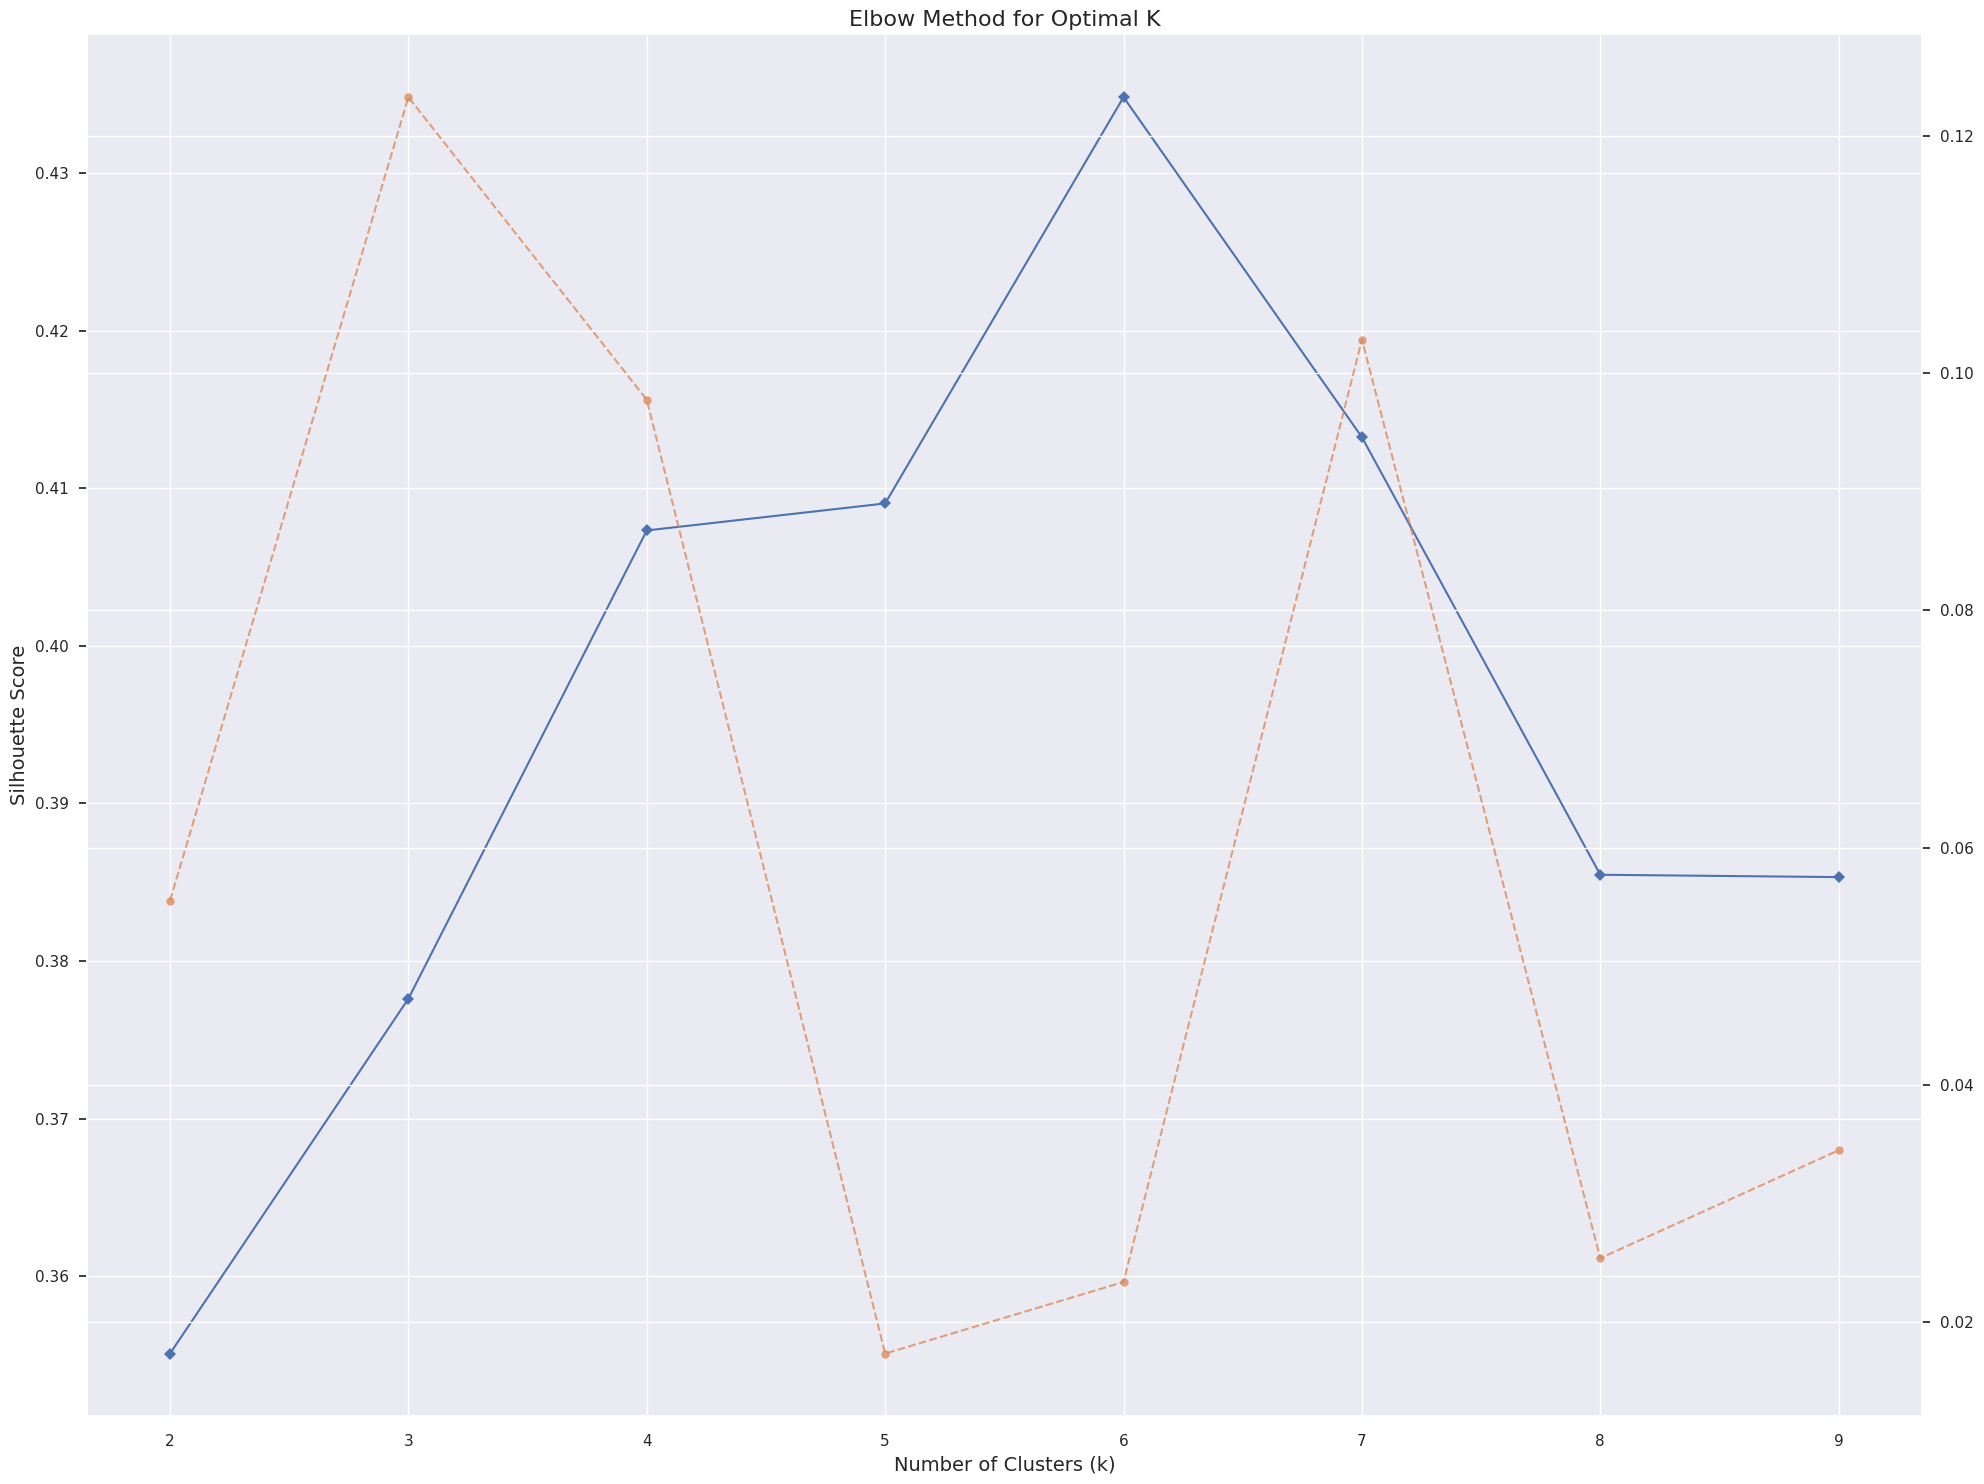

In [ ]:
np.random.seed(0)
t = np.random.rand(100, 2)

# Create a KMeans model
model = KMeans(random_state=40)

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(t)

# Set custom title and labels
visualizer.ax.set_title('Elbow Method for Optimal K', fontsize=16)
visualizer.ax.set_xlabel('Number of Clusters (k)', fontsize=14)
visualizer.ax.set_ylabel('Silhouette Score', fontsize=14)

# Show the visualization
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(0)
t = np.random.rand(100, 2)
df = pd.DataFrame(data=t, columns=['Feature1', 'Feature2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)

# Assign cluster labels to the DataFrame
df['cluster_num'] = kmeans.labels_

# Print the cluster labels for each data point
print("Cluster Labels:", kmeans.labels_)

# Print within-cluster sum of squares (inertia)
print("Inertia:", kmeans.inertia_)

# Print the number of iterations
print("Number of Iterations:", kmeans.n_iter_)

# Print the coordinates of cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Labels: [0 0 3 3 1 0 0 2 3 0 0 3 3 3 1 3 3 3 0 0 2 1 0 2 2 1 1 2 1 2 2 1 2 1 1 0 0
 1 2 2 2 3 1 1 0 3 3 2 1 1 1 0 3 0 3 3 1 1 0 0 0 0 3 2 1 1 2 0 0 1 1 3 0 3
 0 3 3 3 0 2 1 0 0 2 1 1 2 1 3 1 3 1 0 0 1 2 3 0 2 2]
Inertia: 3.9335927085876174
Number of Iterations: 8
Cluster Centers:
 [[0.75608324 0.68721106]
 [0.70451808 0.22763783]
 [0.23153284 0.23420766]
 [0.24456186 0.76627746]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



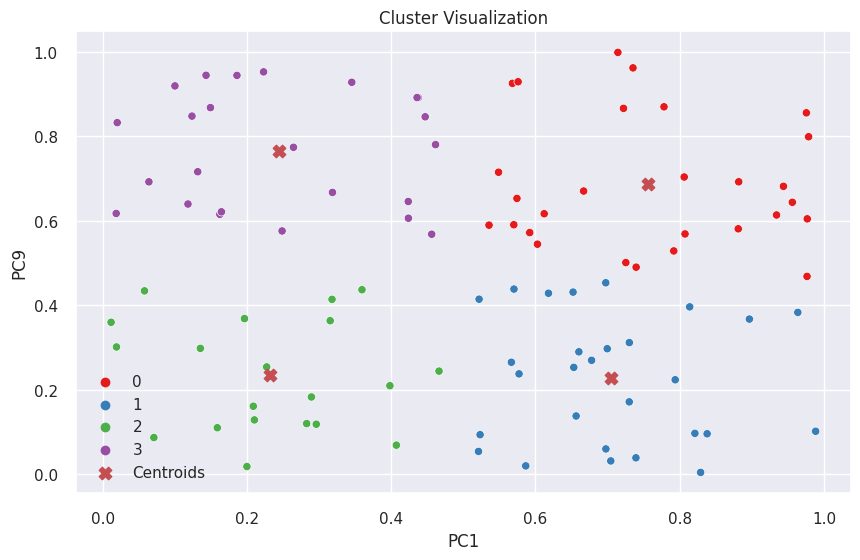

In [ ]:
data2 = df  # Assuming you've used the DataFrame 'df' from the previous code

# Create a scatter plot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=data2, x="Feature1", y="Feature2", hue="cluster_num", palette="Set1")

# Add cluster centroids as red 'X' markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="X", c="r", s=80, label="Centroids")

plt.legend()
plt.title("Cluster Visualization")
plt.xlabel("PC1")
plt.ylabel("PC9")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

55811.56310679609


In [ ]:
lm.coef_

array([-7.13292236e-11,  8.00355338e-11,  4.77484718e-12, -9.32232069e-11,
       -2.86490831e-11, -2.04636308e-11,  1.06865627e-11,  3.39685589e+04,
       -1.45519152e-11])

In [ ]:
predictions=lm.predict(X_test)
predictions

array([ 45000.,  30000.,  62900.,  38987.,  36837.,  65620.,  34900.,
        40000.,  47500.,  31184.,  31900.,  45000.,  24534., 180781.,
        79445.,  38105.,  53500.,  34459.,  45000., 215000.,  58620.,
        68040.,  70631.,  24790., 149000., 102945., 148301.,  40000.,
        56440.,  65000.,  36837.,  37500.,  33971., 125000.,  33000.,
        35000.,  37900.,  60437.,  29146.,  33246.,  67358.,  37237.])

In [ ]:
y_test

37     45000
1      30000
69     62900
80     38987
92     36837
61     65620
85     34900
53     40000
88     47500
32     31184
6      31900
71     45000
43     24534
16    180781
50     79445
31     38105
97     53500
14     34459
25     45000
51    215000
21     58620
3      68040
84     70631
57     24790
48    149000
47    102945
79    148301
58     40000
2      56440
13     65000
45     36837
89     37500
41     33971
23    125000
26     33000
22     35000
94     37900
27     60437
20     29146
66     33246
30     67358
35     37237
Name: PriceEuro, dtype: int64

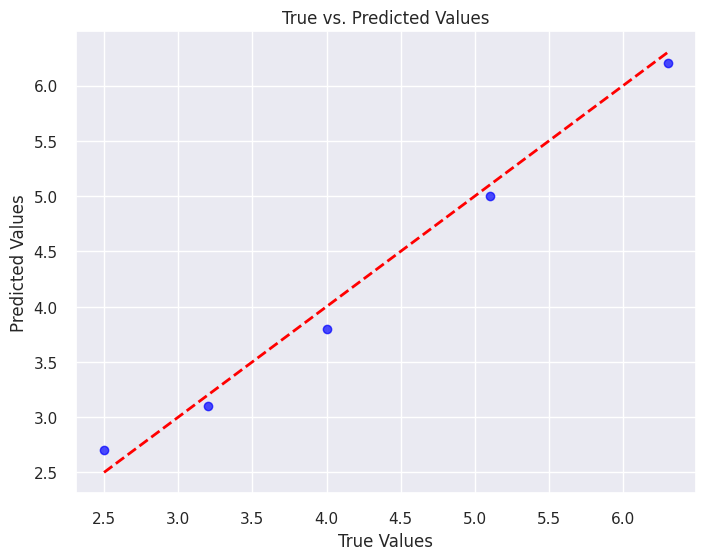

In [ ]:
y_test = np.array([2.5, 3.2, 4.0, 5.1, 6.3])
predictions = np.array([2.7, 3.1, 3.8, 5.0, 6.2])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', marker='o', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("True vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np

# Example predicted and true values (replace with your actual data)
y_test = np.array([2.5, 3.2, 4.0, 5.1, 6.3])
predictions = np.array([2.7, 3.1, 3.8, 5.0, 6.2])

# Calculate and print metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Metrics:
Mean Absolute Error (MAE): 0.13999999999999996
Mean Squared Error (MSE): 0.022000000000000002
Root Mean Squared Error (RMSE): 0.14832396974191325
